In [75]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [76]:
# read cycling data and review
data=pd.read_csv("garmin cycling data.csv")
data.head()

,Activity Type,Datetime,Date,Daytime,Title,Time,Moving Time,Elapsed Time,L/R Balance,Distance,...,Avg Power,Max Power,Total Strokes,Min Temp,Max Temp,Avg Resp,Min Resp,Max Resp,Min Elevation,Max Elevation
0,Road Cycling,8/27/22 10:49,8/27/2022,10:49:00 AM,New York Road Cycling,2:42:46,2:42:01,3:20:29,50% L / 50% R,40.25,...,104.0,415.0,10082.0,82.4,84.0,25.0,13.0,37.0,8.0,219.0
1,Road Cycling,8/20/22 6:23,8/20/2022,6:23:00 AM,New York Road Cycling,5:05:06,4:59:23,7:25:45,50% L / 50% R,73.61,...,102.0,486.0,18153.0,73.4,90.0,26.0,12.0,38.0,-18.0,205.0
2,Road Cycling,8/19/22 9:27,8/19/2022,9:27:00 AM,Oyster Bay Road Cycling,3:19:33,3:19:07,3:51:15,49% L / 51% R,62.43,...,147.0,451.0,15576.0,77.0,86.0,34.0,15.0,40.0,24.0,292.0
3,Road Cycling,8/13/22 7:41,8/13/2022,7:41:00 AM,New York Road Cycling,6:08:34,6:05:54,8:28:30,49% L / 51% R,100.25,...,122.0,471.0,26032.0,68.0,84.0,30.0,12.0,38.0,7.0,165.0
4,Road Cycling,8/6/22 11:57,8/6/2022,11:57:00 AM,New York Road Cycling,2:40:40,2:39:03,4:24:48,50% L / 50% R,35.96,...,91.0,372.0,8679.0,86.0,90.0,26.0,12.0,36.0,26.0,337.0


In [77]:
# drop columns that are not needed
data.drop(columns=['Activity Type', 'Title', 'Time'], axis=1, inplace=True)

In [78]:
# review after dropping columns
data.head()

,Datetime,Date,Daytime,Moving Time,Elapsed Time,L/R Balance,Distance,Calories,Avg HR,Max HR,...,Avg Power,Max Power,Total Strokes,Min Temp,Max Temp,Avg Resp,Min Resp,Max Resp,Min Elevation,Max Elevation
0,8/27/22 10:49,8/27/2022,10:49:00 AM,2:42:01,3:20:29,50% L / 50% R,40.25,1211.0,123.0,162.0,...,104.0,415.0,10082.0,82.4,84.0,25.0,13.0,37.0,8.0,219.0
1,8/20/22 6:23,8/20/2022,6:23:00 AM,4:59:23,7:25:45,50% L / 50% R,73.61,2195.0,130.0,161.0,...,102.0,486.0,18153.0,73.4,90.0,26.0,12.0,38.0,-18.0,205.0
2,8/19/22 9:27,8/19/2022,9:27:00 AM,3:19:07,3:51:15,49% L / 51% R,62.43,2011.0,153.0,173.0,...,147.0,451.0,15576.0,77.0,86.0,34.0,15.0,40.0,24.0,292.0
3,8/13/22 7:41,8/13/2022,7:41:00 AM,6:05:54,8:28:30,49% L / 51% R,100.25,3142.0,142.0,166.0,...,122.0,471.0,26032.0,68.0,84.0,30.0,12.0,38.0,7.0,165.0
4,8/6/22 11:57,8/6/2022,11:57:00 AM,2:39:03,4:24:48,50% L / 50% R,35.96,1071.0,131.0,159.0,...,91.0,372.0,8679.0,86.0,90.0,26.0,12.0,36.0,26.0,337.0


In [79]:
# statistics of the data
data.describe()

,Distance,Calories,Avg HR,Max HR,Aerobic TE,Avg Speed,Max Speed,Total Ascent,Total Descent,Avg Bike Cadence,...,Avg Power,Max Power,Total Strokes,Min Temp,Max Temp,Avg Resp,Min Resp,Max Resp,Min Elevation,Max Elevation
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,39.807917,1389.881944,141.340278,174.152778,3.749306,15.022917,29.878472,1352.868056,1352.451389,85.395833,...,111.006944,445.152778,12368.784722,66.375000,75.875000,27.930556,17.069444,37.840278,-0.777778,277.479167
std,26.715413,875.957622,7.880367,7.717313,1.064559,1.924764,5.091666,1158.345240,1158.677995,21.180615,...,9.904789,32.262108,25718.989291,9.937564,11.465287,2.627591,1.967046,4.518282,86.463335,269.278496
min,1.670000,76.000000,106.000000,138.000000,0.700000,8.300000,16.700000,36.000000,43.000000,52.000000,...,52.000000,281.000000,1141.000000,41.000000,42.000000,17.000000,12.000000,18.000000,-528.000000,-127.000000
25%,21.020000,781.000000,139.000000,170.000000,2.700000,14.000000,26.975000,685.000000,644.500000,77.000000,...,111.000000,445.000000,5382.000000,59.000000,67.750000,28.000000,17.000000,38.000000,-18.000000,145.750000
50%,34.670000,1210.000000,144.000000,174.000000,3.900000,15.050000,28.950000,1081.000000,1104.000000,81.000000,...,111.000000,445.000000,8230.000000,66.200000,77.000000,28.000000,17.000000,38.000000,5.000000,196.500000
75%,49.617500,1697.500000,145.000000,179.000000,4.900000,16.100000,32.225000,1650.250000,1679.250000,85.000000,...,111.000000,445.000000,12336.750000,75.200000,85.000000,29.000000,17.000000,40.000000,21.000000,284.000000
max,118.720000,4449.000000,156.000000,194.000000,5.000000,22.600000,56.700000,7198.000000,7293.000000,224.000000,...,147.000000,548.000000,306000.000000,86.000000,96.000000,34.000000,30.000000,44.000000,302.000000,1420.000000


In [80]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# only need to scale following columns
cols_to_scale = ['Distance', 'Calories', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Speed', 'Max Speed', 'Total Ascent', 'Total Descent', 'Avg Bike Cadence',
                 'Max Bike Cadence', 'Normalized Power', 'Training Stress Score', 'Max Avg Power (20 min)', 'Avg Power', 'Max Power', 'Total Strokes', 'Min Temp', 'Max Temp', 'Avg Resp', 'Min Resp', 'Max Resp',
                 'Min Elevation', 'Max Elevation']


data_scaled = scaler.fit_transform(data[cols_to_scale])

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,...,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02
mean,-1.356939e-16,1.048544e-16,8.141636e-16,8.079956e-16,-7.154771e-16,-1.973730e-16,1.719304e-16,-8.635068e-17,-1.850372e-17,2.467162e-16,...,1.367058e-16,1.831097e-16,-1.850372e-17,6.476301e-17,1.541976e-18,-5.921189e-16,8.326673e-16,-1.973730e-16,1.233581e-17,-8.018277e-17
std,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,...,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00
min,-1.432545e+00,-1.505173e+00,-4.500251e+00,-4.700984e+00,-2.874381e+00,-3.505044e+00,-2.597278e+00,-1.140821e+00,-1.134070e+00,-1.582220e+00,...,-5.978209e+00,-5.105858e+00,-4.380800e-01,-2.562355e+00,-2.964883e+00,-4.174435e+00,-2.586182e+00,-4.406438e+00,-6.118922e+00,-1.507328e+00
25%,-7.057160e-01,-6.975305e-01,-2.980123e-01,-5.399901e-01,-9.891118e-01,-5.333055e-01,-5.722305e-01,-5.785833e-01,-6.131319e-01,-3.977759e-01,...,-7.035671e-04,-4.752046e-03,-2.726068e-01,-7.447240e-01,-7.111344e-01,2.652119e-02,-3.542715e-02,3.547360e-02,-1.998805e-01,-4.909005e-01
50%,-1.929916e-01,-2.060714e-01,3.386905e-01,-1.986586e-02,1.420498e-01,1.412010e-02,-1.829879e-01,-2.355230e-01,-2.151750e-01,-2.082648e-01,...,-7.035671e-04,-4.752046e-03,-1.614850e-01,-1.767142e-02,9.846476e-02,2.652119e-02,-3.542715e-02,3.547360e-02,6.705668e-02,-3.017761e-01
75%,3.684698e-01,3.524049e-01,4.660311e-01,6.302895e-01,1.084685e+00,5.615457e-01,4.624652e-01,2.576261e-01,2.830288e-01,-1.875370e-02,...,-7.035671e-04,-4.752046e-03,-1.249914e-03,8.911443e-01,7.986586e-01,4.084263e-01,-3.542715e-02,4.796648e-01,2.527521e-01,2.430047e-02
max,2.964114e+00,3.504502e+00,1.866777e+00,2.580756e+00,1.178948e+00,3.950371e+00,5.286118e+00,5.063718e+00,5.144901e+00,6.566757e+00,...,3.646588e+00,3.198991e+00,1.145675e+01,1.981723e+00,1.761425e+00,2.317952e+00,6.596536e+00,1.368047e+00,3.514028e+00,4.257706e+00


In [81]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [82]:
# inertia on the fitted data
kmeans.inertia_

2876.748820739138

Text(0, 0.5, 'Inertia')

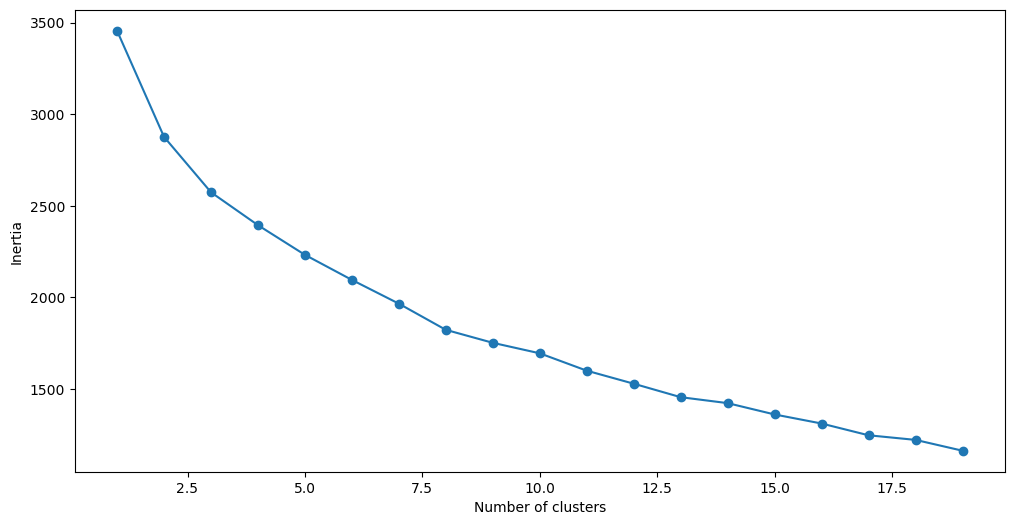

In [83]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


In [84]:
# Elbow method - optium cluster value is probably between 5-8
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [85]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    53
1    44
3    34
2    10
4     3
Name: cluster, dtype: int64